# Part 1: Trading Model Basics

- Market data are provided as "bars" or "candlesticks"
- We can also have tick data with bid/ask prices

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
spy = get_pricing('SPY',start_date='2018-1-1',end_date='2018-08-20',frequency='minute')

Print the contents of the data:

In [5]:
spy

,open_price,high,low,close_price,volume,price
2018-01-02 14:31:00+00:00,265.580,265.629,265.411,265.471,1164707.0,265.471
2018-01-02 14:32:00+00:00,265.471,265.480,265.342,265.361,472361.0,265.361
2018-01-02 14:33:00+00:00,265.357,265.510,265.342,265.431,262439.0,265.431
2018-01-02 14:34:00+00:00,265.431,265.441,265.282,265.292,301185.0,265.292
2018-01-02 14:35:00+00:00,265.287,265.342,265.203,265.213,317255.0,265.213
2018-01-02 14:36:00+00:00,265.223,265.262,265.183,265.223,259624.0,265.223
2018-01-02 14:37:00+00:00,265.223,265.252,265.143,265.203,289371.0,265.203
2018-01-02 14:38:00+00:00,265.213,265.361,265.203,265.358,393936.0,265.358
2018-01-02 14:39:00+00:00,265.361,265.480,265.342,265.461,298820.0,265.461
2018-01-02 14:40:00+00:00,265.471,265.550,265.461,265.533,478148.0,265.533


How does the get_pricing function work?

In [6]:
?get_pricing

Plot the market data:

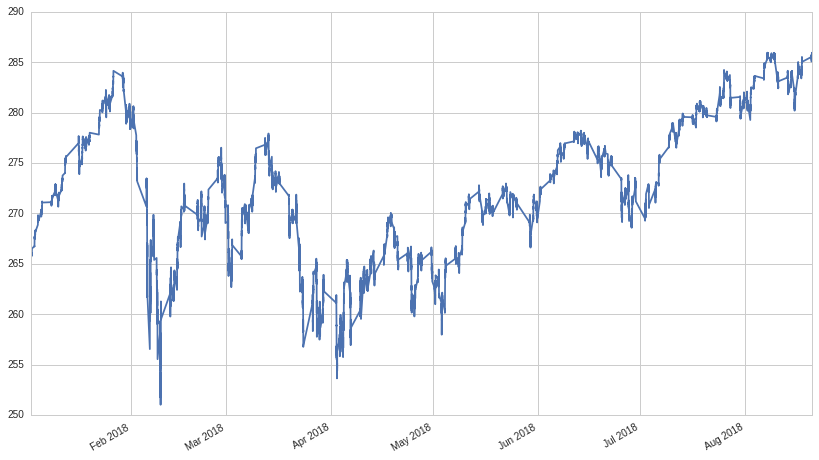

In [7]:
spy['price'].plot()

This is how we calculate returns. They are important because most of the time we have a certain amount of capital to distribute between stocks with different prices. If we just use the dollar value we give too much weight to high-priced stocks.

In [8]:
ret = spy['price'].pct_change()[1:]

Contrary to academic assumptions, returns are generally not normally distributed.

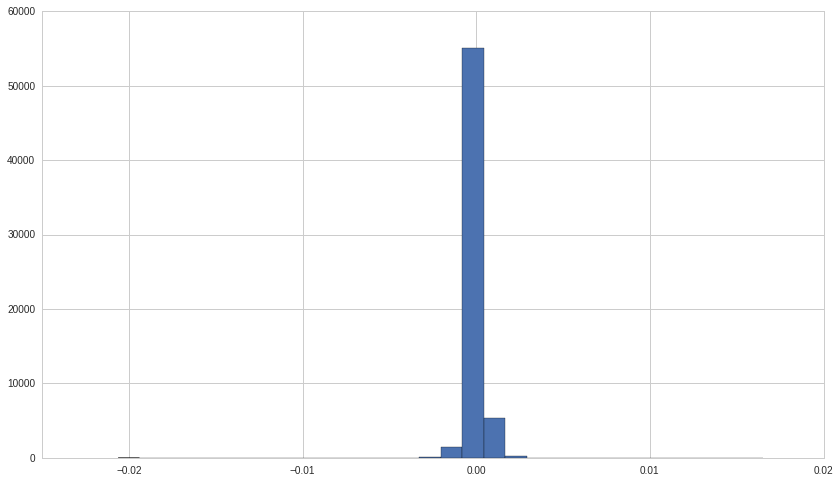

In [9]:
xt = plt.hist(np.array(ret),30)

We can test this. The Jarque-Bera p-value > 0.05 tells us that we cannot reject the probability the null-hypothesis that the underlying distribution is normal. In other words: the underlying distribution could be normal.

In [17]:
import scipy.stats as st
for N in [10,100,1000,10000,100000,10000000]:
    print('p-value:',st.jarque_bera(np.random.randn(N))[1])

('p-value:', 0.721631802945498)
('p-value:', 0.38339423709031806)
('p-value:', 0.82396369901378419)
('p-value:', 0.67785260462158803)
('p-value:', 0.10854711343175028)
('p-value:', 0.21464837289711092)


In [134]:
stats.jarque_bera(ret)

(72275392.663798004, 0.0)

In [20]:
aapl = get_pricing('AAPL',start_date='2018-1-1',end_date='2018-1-2',frequency='minute')
spy2 = get_pricing('SPY',start_date='2018-1-1',end_date='2018-1-2',frequency='minute')

array([   2.03150524, -373.44179847])

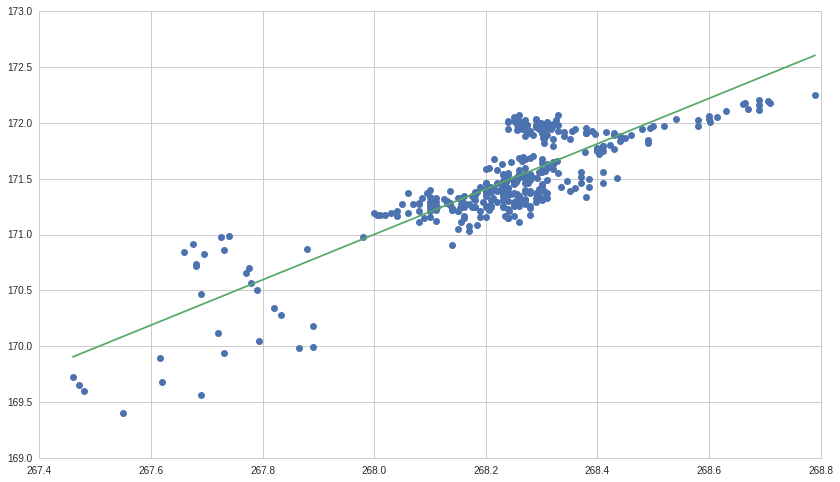

In [332]:
x = spy2['price'].values
y = aapl['price'].values

plt.plot(x,y,'o')
m = np.polyfit(x,y,1)
xx = np.linspace(min(x),max(x),1000)
yy = np.polyval(m,xx)
plt.plot(xx,yy)

Let's have a look at two important techniques for trading: forward filling and resampling.
Before we do that we create an artificial price series with some invalid entries:

In [22]:
my_price = np.cumsum(np.random.randn(len(aapl.index)))
my_price[3] = np.nan
my_price[7] = np.nan
my_price[10] = np.nan
df = pd.DataFrame(my_price,aapl.index)
df

,0
2018-01-02 14:31:00+00:00,-0.477216
2018-01-02 14:32:00+00:00,-2.053648
2018-01-02 14:33:00+00:00,-1.308211
2018-01-02 14:34:00+00:00,NaN
2018-01-02 14:35:00+00:00,0.371275
2018-01-02 14:36:00+00:00,0.235250
2018-01-02 14:37:00+00:00,1.379492
2018-01-02 14:38:00+00:00,NaN
2018-01-02 14:39:00+00:00,2.153443
2018-01-02 14:40:00+00:00,1.754520


## Data Transformation
Now we fill the missing values with the previous days' prices. This is a very common techique to deal with this problem. There is also a backfill method - df.bfill() - but this should not normally be used as causes our data to look into the future.

In [23]:
df = df.ffill()

Next, we look a resampling. The Pandas package makes this really easy. Often we need to transform our data to a different frequency. For example, if we run a trading system that trades daily we don't need one-minute resolution. 

In [24]:
df.resample('10min').ohlc()

0                                 
                                open       high        low      close
2018-01-02 14:30:00+00:00  -0.477216   2.153443  -2.053648   2.153443
2018-01-02 14:40:00+00:00   1.754520   3.045587   0.692777   1.979822
2018-01-02 14:50:00+00:00   0.972926   2.712080   0.972926   2.572733
2018-01-02 15:00:00+00:00   2.922258   2.940655   0.531857   1.923855
2018-01-02 15:10:00+00:00   2.114010   3.192382   1.119792   2.523783
2018-01-02 15:20:00+00:00   1.537076   5.931047   0.460236   5.931047
2018-01-02 15:30:00+00:00   7.512658   7.798600   3.796430   3.796430
2018-01-02 15:40:00+00:00   4.607148   7.832224   4.607148   7.197761
2018-01-02 15:50:00+00:00   8.652004   8.652004   6.855795   6.855795
2018-01-02 16:00:00+00:00   5.830676  10.483981   5.830676  10.483981
2018-01-02 16:10:00+00:00   9.125143  11.006072   8.111306   9.862006
2018-01-02 16:20:00+00:00   9.916987  10.171433   6.900843   9.109802
2018-01-02 16:30:00+00:00   7.898023   7.898023   4.731964   6.821218
2018-01-02 16:40:00+00:00   5.610316  10.546270   5.528703  10.546270
2018-01-02 16:50:00+00:00   9.916664  10.733123   6.694996   6.694996
2018-01-02 17:00:00+00:00   5.359948   5.538122   4.136139   4.136139
2018-01-02 17:10:00+00:00   4.088261   4.088261  -3.408436  -3.408436
2018-01-02 17:20:00+00:00  -5.141223  -2.858992  -6.665340  -6.086355
2018-01-02 17:30:00+00:00  -5.260422  -5.123216 -10.912654 -10.912654
2018-01-02 17:40:00+00:00 -11.588876 -10.328709 -14.047235 -12.916921
2018-01-02 17:50:00+00:00 -11.916978 -11.916978 -16.475374 -15.633156
2018-01-02 18:00:00+00:00 -17.375277 -16.292801 -18.580432 -16.292801
2018-01-02 18:10:00+00:00 -16.733387 -12.782571 -16.733387 -15.710029
2018-01-02 18:20:00+00:00 -15.344279 -15.344279 -17.769724 -16.997150
2018-01-02 18:30:00+00:00 -16.521555 -16.285481 -19.381229 -16.285481
2018-01-02 18:40:00+00:00 -17.923976 -17.353568 -19.763984 -19.763984
2018-01-02 18:50:00+00:00 -19.859436 -19.577225 -22.936547 -22.936547
2018-01-02 19:00:00+00:00 -21.171965 -18.194032 -21.171965 -18.194032
2018-01-02 19:10:00+00:00 -17.592174 -15.750013 -21.873839 -19.837356
2018-01-02 19:20:00+00:00 -20.314420 -19.468895 -21.517807 -21.471818
2018-01-02 19:30:00+00:00 -22.712165 -22.242817 -26.348141 -25.125109
2018-01-02 19:40:00+00:00 -25.118434 -23.563314 -26.966524 -26.938970
2018-01-02 19:50:00+00:00 -28.169644 -27.965924 -30.797675 -30.782707
2018-01-02 20:00:00+00:00 -31.807760 -26.795829 -31.807760 -26.795829
2018-01-02 20:10:00+00:00 -26.767919 -26.767919 -31.028121 -27.558657
2018-01-02 20:20:00+00:00 -27.151075 -25.015562 -28.300438 -28.300438
2018-01-02 20:30:00+00:00 -28.882515 -28.882515 -36.589815 -36.589815
2018-01-02 20:40:00+00:00 -36.849903 -36.471722 -38.872833 -36.471722
2018-01-02 20:50:00+00:00 -36.503303 -33.177829 -36.791322 -36.791322
2018-01-02 21:00:00+00:00 -37.288504 -37.288504 -37.288504 -37.288504

In [25]:
df.resample('1H').last() # This would be used for "close" price
df.resample('1H').mean() # # Average price in 1 period
df.resample('1H').sum() # This would be used for volume

,0
2018-01-02 14:00:00+00:00,37.546469
2018-01-02 15:00:00+00:00,272.915363
2018-01-02 16:00:00+00:00,490.101724
2018-01-02 17:00:00+00:00,-326.625637
2018-01-02 18:00:00+00:00,-1058.829035
2018-01-02 19:00:00+00:00,-1383.056915
2018-01-02 20:00:00+00:00,-1906.257132
2018-01-02 21:00:00+00:00,-37.288504


## Backtesting

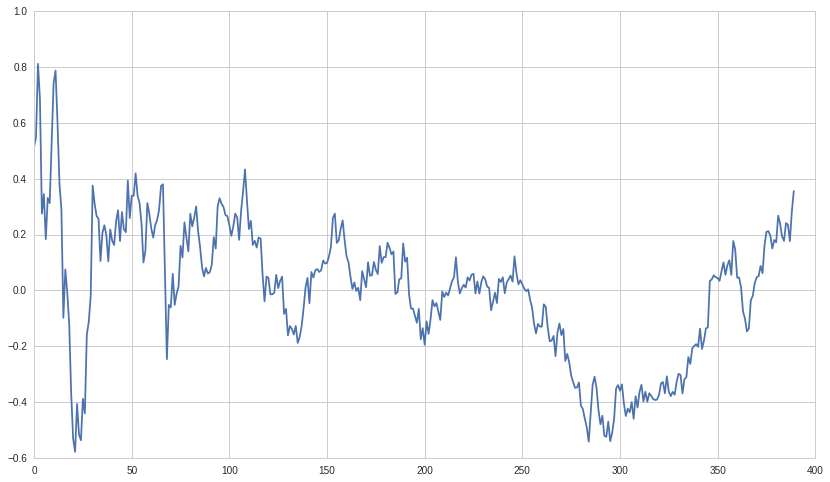

In [155]:
resid = m[0]*x - y + m[1]
plt.plot(resid)

Here we use a moving average on the same data:

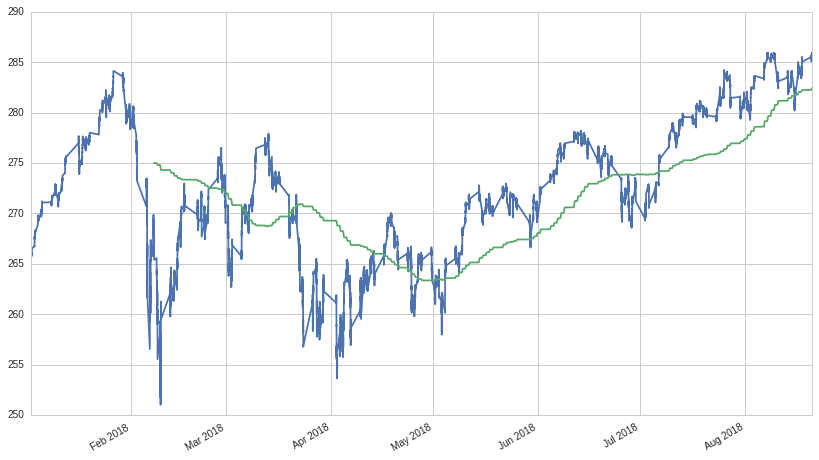

In [31]:
spy['price'].plot()
sma = spy['price'].rolling(10000).mean()
sma.plot()

De-trending the data by subtracting the SMA.

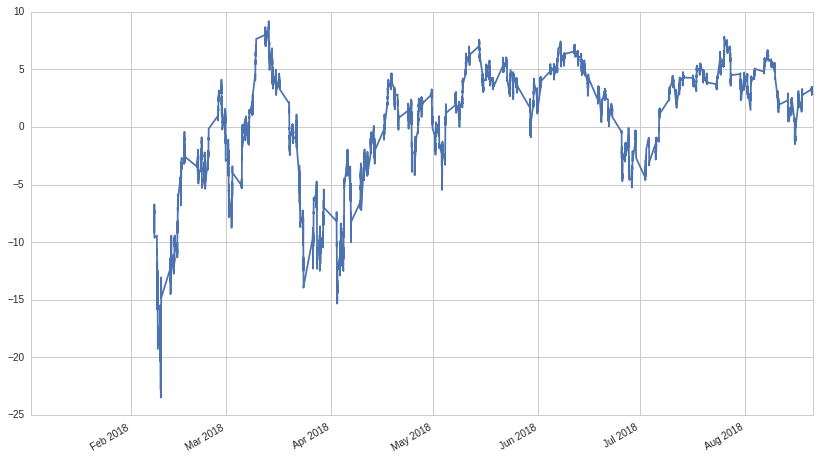

In [32]:
(spy['price']-sma).plot()

Now, let's look at a different timeframe:

In [33]:
spy3 = get_pricing('SPY',start_date='2003-1-1',end_date='2018-8-2',frequency='daily')

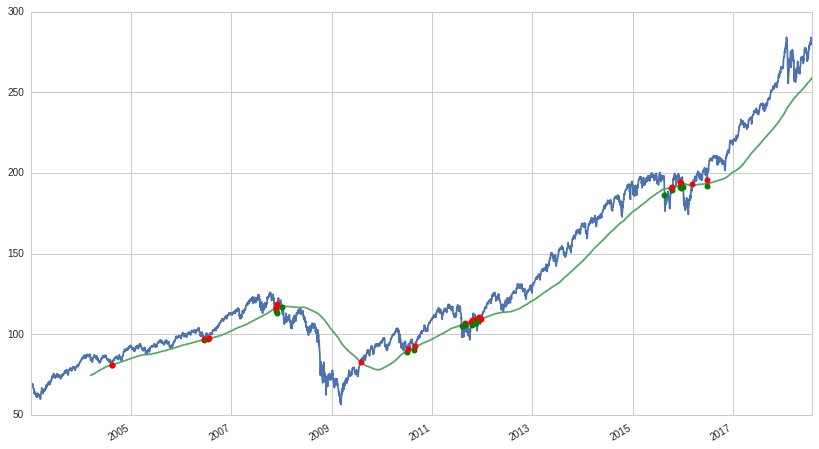

In [61]:
spy3['price'].plot()
sma3 = spy3['price'].rolling(300).mean()
sma3.plot()

for i,s in enumerate(spy3['price']):
    if (np.sign(spy3['price'].iloc[i]-sma3.iloc[i]))>(np.sign(spy3['price'].iloc[i-1]-sma3.iloc[i-1])):
        plt.plot(spy3.index[i],spy3['price'].iloc[i],'ro',ms=6)
    elif (np.sign(spy3['price'].iloc[i]-sma3.iloc[i]))<(np.sign(spy3['price'].iloc[i-1]-sma3.iloc[i-1])):
        plt.plot(spy3.index[i],spy3['price'].iloc[i],'go',ms=6)

Our first backtest, using a momentum strategy on the SPY. We trade long-only over a long-term timeframe.

In [62]:
pnl = [0]
for i,s in enumerate(spy3['price']):
    if (np.sign(spy3['price'].iloc[i]-sma3.iloc[i]))>(np.sign(spy3['price'].iloc[i-1]-sma3.iloc[i-1])):
        pnl.append(spy3['price'].iloc[i]-long_entry)
    elif (np.sign(spy3['price'].iloc[i]-sma3.iloc[i]))<(np.sign(spy3['price'].iloc[i-1]-sma3.iloc[i-1])):
        long_entry = spy3['price'].iloc[i]

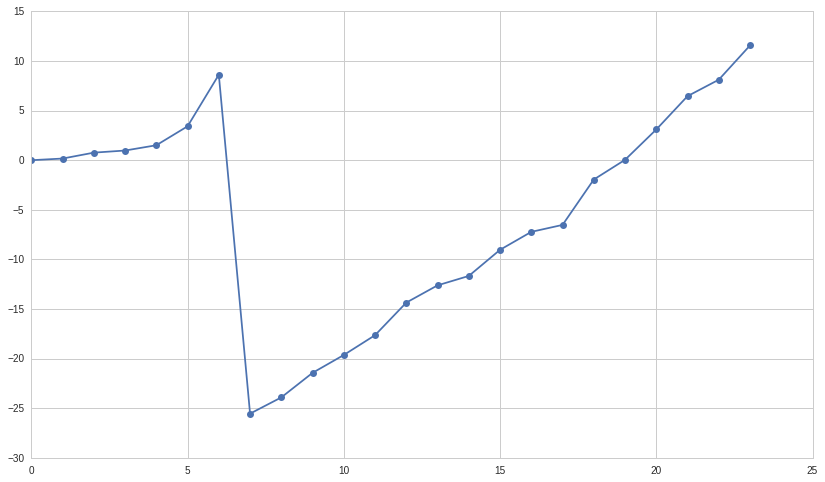

In [63]:
plt.plot(np.cumsum(pnl),'-o')

Our second backtest using the short-term moving average from above. Here we trade the expected reversion of the price back to the mean price long or short.

In [37]:
k = []
inpos = 0
pnl = [0]
for i,s in enumerate(spy['price']):
    res = s-sma.iloc[i]
    if res>6 and not inpos:
        entry = s
        inpos = -1
    elif res < 0 and inpos==-1:
        pnl.append(entry - s)
        inpos = 0
    elif res<-6 and not inpos:
        entry = s
        inpos = 1
    elif res > 0 and inpos==1:
        pnl.append(s-entry)
        inpos = 0    

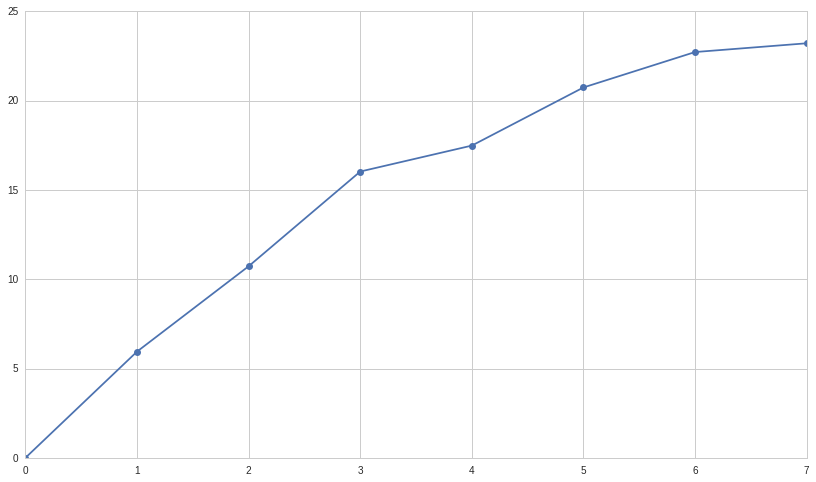

In [38]:
plt.plot(np.cumsum(pnl),'-o')

### Exercise: put the above backtest in a function and optimise the strategy parameters.

# Part 2: Pipeline
- Factors
- Filters
- Classifiers
- Data

In [43]:
from quantopian.pipeline import Pipeline
from quantopian.research import run_pipeline

In [44]:
my_pipe = Pipeline()
run_pipeline(my_pipe, '2015-05-05', '2015-05-05')

Empty DataFrame
Columns: []
Index: [(2015-05-05 00:00:00+00:00, Equity(2 [ARNC])), (2015-05-05 00:00:00+00:00, Equity(21 [AAME])), (2015-05-05 00:00:00+00:00, Equity(24 [AAPL])), (2015-05-05 00:00:00+00:00, Equity(25 [ARNC_PR])), (2015-05-05 00:00:00+00:00, Equity(31 [ABAX])), (2015-05-05 00:00:00+00:00, Equity(39 [DDC])), (2015-05-05 00:00:00+00:00, Equity(41 [ARCB])), (2015-05-05 00:00:00+00:00, Equity(52 [ABM])), (2015-05-05 00:00:00+00:00, Equity(53 [ABMD])), (2015-05-05 00:00:00+00:00, Equity(62 [ABT])), (2015-05-05 00:00:00+00:00, Equity(64 [ABX])), (2015-05-05 00:00:00+00:00, Equity(66 [AB])), (2015-05-05 00:00:00+00:00, Equity(67 [ADSK])), (2015-05-05 00:00:00+00:00, Equity(69 [ACAT])), (2015-05-05 00:00:00+00:00, Equity(70 [VBF])), (2015-05-05 00:00:00+00:00, Equity(76 [TAP])), (2015-05-05 00:00:00+00:00, Equity(84 [ACET])), (2015-05-05 00:00:00+00:00, Equity(86 [ACG])), (2015-05-05 00:00:00+00:00, Equity(88 [ACI])), (2015-05-05 00:00:00+00:00, Equity(100 [IEP])), (2015-05-05 00:00:00+00:00, Equity(106 [ACU])), (2015-05-05 00:00:00+00:00, Equity(110 [ACXM])), (2015-05-05 00:00:00+00:00, Equity(112 [ACY])), (2015-05-05 00:00:00+00:00, Equity(114 [ADBE])), (2015-05-05 00:00:00+00:00, Equity(117 [AEY])), (2015-05-05 00:00:00+00:00, Equity(122 [ADI])), (2015-05-05 00:00:00+00:00, Equity(128 [ADM])), (2015-05-05 00:00:00+00:00, Equity(134 [SXCL])), (2015-05-05 00:00:00+00:00, Equity(149 [ADX])), (2015-05-05 00:00:00+00:00, Equity(153 [AE])), (2015-05-05 00:00:00+00:00, Equity(154 [AEM])), (2015-05-05 00:00:00+00:00, Equity(157 [AEG])), (2015-05-05 00:00:00+00:00, Equity(161 [AEP])), (2015-05-05 00:00:00+00:00, Equity(162 [AEPI])), (2015-05-05 00:00:00+00:00, Equity(166 [AES])), (2015-05-05 00:00:00+00:00, Equity(168 [AET])), (2015-05-05 00:00:00+00:00, Equity(185 [AFL])), (2015-05-05 00:00:00+00:00, Equity(192 [ATAX])), (2015-05-05 00:00:00+00:00, Equity(197 [AGCO])), (2015-05-05 00:00:00+00:00, Equity(216 [HES])), (2015-05-05 00:00:00+00:00, Equity(225 [AHPI])), (2015-05-05 00:00:00+00:00, Equity(239 [AIG])), (2015-05-05 00:00:00+00:00, Equity(247 [AIN])), (2015-05-05 00:00:00+00:00, Equity(253 [AIR])), (2015-05-05 00:00:00+00:00, Equity(266 [AJG])), (2015-05-05 00:00:00+00:00, Equity(270 [AKRX])), (2015-05-05 00:00:00+00:00, Equity(273 [ALU])), (2015-05-05 00:00:00+00:00, Equity(283 [ALCO])), (2015-05-05 00:00:00+00:00, Equity(289 [MATX])), (2015-05-05 00:00:00+00:00, Equity(300 [ALK])), (2015-05-05 00:00:00+00:00, Equity(301 [ALKS])), (2015-05-05 00:00:00+00:00, Equity(311 [ALOG])), (2015-05-05 00:00:00+00:00, Equity(312 [ALOT])), (2015-05-05 00:00:00+00:00, Equity(328 [ALTR])), (2015-05-05 00:00:00+00:00, Equity(332 [ALX])), (2015-05-05 00:00:00+00:00, Equity(337 [AMAT])), (2015-05-05 00:00:00+00:00, Equity(351 [AMD])), (2015-05-05 00:00:00+00:00, Equity(353 [AME])), (2015-05-05 00:00:00+00:00, Equity(357 [TWX])), (2015-05-05 00:00:00+00:00, Equity(366 [AVD])), (2015-05-05 00:00:00+00:00, Equity(368 [AMGN])), (2015-05-05 00:00:00+00:00, Equity(371 [TVTY])), (2015-05-05 00:00:00+00:00, Equity(392 [AMS])), (2015-05-05 00:00:00+00:00, Equity(393 [AMSC])), (2015-05-05 00:00:00+00:00, Equity(397 [AMSW_A])), (2015-05-05 00:00:00+00:00, Equity(405 [AMWD])), (2015-05-05 00:00:00+00:00, Equity(410 [AN])), (2015-05-05 00:00:00+00:00, Equity(412 [ANAT])), (2015-05-05 00:00:00+00:00, Equity(430 [ANN])), (2015-05-05 00:00:00+00:00, Equity(438 [AON])), (2015-05-05 00:00:00+00:00, Equity(447 [AP])), (2015-05-05 00:00:00+00:00, Equity(448 [APA])), (2015-05-05 00:00:00+00:00, Equity(450 [CLFD])), (2015-05-05 00:00:00+00:00, Equity(451 [APB])), (2015-05-05 00:00:00+00:00, Equity(455 [APC])), (2015-05-05 00:00:00+00:00, Equity(460 [APD])), (2015-05-05 00:00:00+00:00, Equity(465 [APH])), (2015-05-05 00:00:00+00:00, Equity(468 [API])), (2015-05-05 00:00:00+00:00, Equity(474 [APOG])), (2015-05-05 00:00:00+00:00, Equity(484 [ATU])), (2015-05-05 00:00:00+00:00, Equity(508 [AIRM])), (2015-05-05 00:00:00+00:00, Equity(510 [ARG])), (2015-05-05 0

In [45]:
from quantopian.pipeline.data.builtin import USEquityPricing
from quantopian.pipeline.factors import SimpleMovingAverage

In [46]:
sma = SimpleMovingAverage(inputs=[USEquityPricing.close],window_length=20)

In [47]:
my_pipe = Pipeline({'sma':sma,'price':USEquityPricing.close.latest})
run_pipeline(my_pipe, '2015-05-05', '2015-05-05')

price         sma
2015-05-05 00:00:00+00:00 Equity(2 [ARNC])          14.015   13.479100
                          Equity(21 [AAME])            NaN    3.968132
                          Equity(24 [AAPL])        128.699  127.699100
                          Equity(25 [ARNC_PR])         NaN   87.488182
                          Equity(31 [ABAX])         55.030   62.679450
                          Equity(39 [DDC])          19.770   18.420701
                          Equity(41 [ARCB])         36.580   37.406750
                          Equity(52 [ABM])          32.320   32.005150
                          Equity(53 [ABMD])         65.140   67.713500
                          Equity(62 [ABT])          47.010   47.005925
                          Equity(64 [ABX])          13.160   12.742250
                          Equity(66 [AB])           32.400   31.429000
                          Equity(67 [ADSK])         57.760   60.927500
                          Equity(69 [ACAT])         35.310   36.532050
                          Equity(70 [VBF])          18.570   18.734371
                          Equity(76 [TAP])          73.640   75.969750
                          Equity(84 [ACET])         19.320   20.565500
                          Equity(86 [ACG])           7.785    7.781023
                          Equity(88 [ACI])           0.995    1.026050
                          Equity(100 [IEP])         91.500   91.319600
                          Equity(106 [ACU])         18.450   18.718900
                          Equity(110 [ACXM])        17.350   18.467500
                          Equity(112 [ACY])         11.520   12.233222
                          Equity(114 [ADBE])        75.860   75.745750
                          Equity(117 [AEY])          2.410    2.406600
                          Equity(122 [ADI])         63.240   63.435950
                          Equity(128 [ADM])         50.340   48.470250
                          Equity(134 [SXCL])           NaN         NaN
                          Equity(149 [ADX])         14.175   14.096350
                          Equity(153 [AE])          47.000   59.032500
...                                                    ...         ...
                          Equity(48945 [HLTH])       7.180    7.172500
                          Equity(48954 [INF_RT])     0.460    0.544444
                          Equity(48955 [TOO_PRB])   24.670   24.790000
                          Equity(48960 [SMCP])      24.920   25.210000
                          Equity(48961 [NYMT_O])       NaN         NaN
                          Equity(48962 [UNIT])      30.120   29.992000
                          Equity(48963 [PAK])       15.540   15.531875
                          Equity(48969 [NSA])       12.990   13.045000
                          Equity(48971 [BSM])       17.750   17.995000
                          Equity(48972 [EVA])       21.283   21.413250
                          Equity(48981 [APIC])      14.360   14.814000
                          Equity(48989 [UK])           NaN   24.946667
                          Equity(48990 [ACWF])      25.250   25.250000
                          Equity(48991 [ISCF])      25.020   24.985000
                          Equity(48992 [INTF])      25.030   25.030000
                          Equity(48993 [JETS])      24.650   24.579333
                          Equity(48994 [ACTX])      15.180   15.097333
                          Equity(48995 [LRGF])      25.090   24.890000
                          Equity(48996 [SMLF])      29.750   29.456667
                          Equity(48997 [VKTX])       9.180    9.115000
                          Equity(48998 [OPGN])         NaN         NaN
                          Equity(48999 [AAPC])      10.144   10.144000
                          Equity(49000 [BPMC])      20.810   20.810000
                          Equity(49001 [CLCD])         NaN         NaN
                          Equity(49004 [TNP_PRD])   24.750   24.750000
      

The result of our pipline is a multi-indexed DataFrame. Here, we can see how this can be accessed.

In [58]:
diff = sma - USEquityPricing.close.latest
my_pipe = Pipeline({'sma':sma,'price':USEquityPricing.close.latest,'diff':diff})
pipe = run_pipeline(my_pipe, '2015-05-05', '2018-05-05')
aapl_eq = pipe.index.get_level_values(1)[2]
dates = np.unique(pipe.index.get_level_values(0))

In [60]:
for i in range(200,220):
    print dates[i], pipe['sma'][dates[i]][aapl_eq]


2016-02-19T00:00:00.000000000 95.8667762715
2016-02-22T00:00:00.000000000 95.8797627777
2016-02-23T00:00:00.000000000 95.6806337554
2016-02-24T00:00:00.000000000 95.4686773926
2016-02-25T00:00:00.000000000 95.3016597467
2016-02-26T00:00:00.000000000 95.4923798007
2016-02-29T00:00:00.000000000 95.6587698775
2016-03-01T00:00:00.000000000 95.6604857795
2016-03-02T00:00:00.000000000 95.8930019722
2016-03-03T00:00:00.000000000 96.231
2016-03-04T00:00:00.000000000 96.515
2016-03-07T00:00:00.000000000 96.8355
2016-03-08T00:00:00.000000000 97.2285
2016-03-09T00:00:00.000000000 97.5295
2016-03-10T00:00:00.000000000 97.835
2016-03-11T00:00:00.000000000 98.18
2016-03-14T00:00:00.000000000 98.6095
2016-03-15T00:00:00.000000000 99.036
2016-03-16T00:00:00.000000000 99.434
2016-03-17T00:00:00.000000000 99.827


However, the real power comes when we apply filters to our system to narrow down the universe that we want to trade.

In [243]:
from quantopian.pipeline.factors.morningstar import MarketCap

mcap = MarketCap()
mktcap = mcap.top(500)
mktcap_rank = mcap.rank().bottom(5)

We can also apply filters to our factors in form of a mask in order to avoid over-calculation. 

In [241]:
sma = SimpleMovingAverage(inputs=[USEquityPricing.close],window_length=20,mask=mktcap)

But we can also apply a filter to the whole pipeline in form of a screen.

In [245]:
my_pipe = Pipeline({'sma':sma,
                    'price':USEquityPricing.close.latest,
                    'diff':diff,
                    'mcap':mcap,
                    'rank':mktcap_rank},screen=mktcap_rank)
pipe = run_pipeline(my_pipe, '2015-05-05', '2018-05-05')

In [220]:
idx_start = pipe['price'][dates[0]].index
idx_end = pipe['price'][dates[-1]].index

Let's calculate how many assets in the top 500 have remained there over the past 3 years.

In [221]:
len(set(idx_start).intersection(set(idx_end)))

405

Now, let's calculate the stocks with the lowest market cap in the SPY. When the SPY rebalances every quarter, it is likely that some stocks which are not in the SPY will have a higher market cap than the current lowest stocks in the SPY. When these stocks get kicked out the big funds will withdraw their money from them and the price is expected to go down. Likewise, the ones the enter will likely see an increase in price.

In [247]:
prev = []
eq = pipe.index.get_level_values(1)[10]
for i in range(len(dates)):
    print (pipe['mcap'][dates[i]].index.get_level_values(0))


Index([ Equity(9507 [ATRM]), Equity(13751 [RNVA]), Equity(21947 [MBVX]),
       Equity(27133 [DCAR]), Equity(28635 [AXPW])],
      dtype='object')
Index([ Equity(9507 [ATRM]), Equity(13751 [RNVA]), Equity(21947 [MBVX]),
       Equity(27133 [DCAR]), Equity(28635 [AXPW])],
      dtype='object')
Index([ Equity(9507 [ATRM]), Equity(13751 [RNVA]), Equity(21947 [MBVX]),
       Equity(27133 [DCAR]), Equity(28635 [AXPW])],
      dtype='object')
Index([ Equity(9507 [ATRM]), Equity(13751 [RNVA]), Equity(21947 [MBVX]),
       Equity(27133 [DCAR]), Equity(28635 [AXPW])],
      dtype='object')
Index([ Equity(9507 [ATRM]), Equity(13751 [RNVA]), Equity(21947 [MBVX]),
       Equity(27133 [DCAR]), Equity(28635 [AXPW])],
      dtype='object')
Index([Equity(13751 [RNVA]),  Equity(14549 [GBR]), Equity(21947 [MBVX]),
       Equity(27133 [DCAR]), Equity(28635 [AXPW])],
      dtype='object')
Index([Equity(13751 [RNVA]),  Equity(14549 [GBR]), Equity(21947 [MBVX]),
       Equity(27133 [DCAR]), Equity(28635 [AX

## Custom Factors

So far we have worked with out-of-the-box factors. We can also design custom factors.

In [188]:
from quantopian.pipeline import CustomFactor, Pipeline

In [193]:
class StdDev(CustomFactor):
    window_length = 252
    inputs=[USEquityPricing.close]
    def compute(self, today, asset_ids, out, values):
        out[:] = np.nanstd(values, axis=0)
sdev = StdDev()

In [197]:
my_pipe.add(sdev,'sdev')
pipe = run_pipeline(my_pipe, '2015-05-05', '2018-05-05')

## Additional Datasets:

Morningstar fundamental data (free): https://www.quantopian.com/help/fundamentals

Sentiment (free): https://www.quantopian.com/data/psychsignal

Quandl (free): https://www.quantopian.com/data/quandl

Great notebook on sentiment analysis: https://www.quantopian.com/posts/sentiment-analysis-with-psychsignal-part-1-visualising-the-data

In [231]:
from quantopian.pipeline.data.psychsignal import stocktwits_limited_free      

my_pipe = Pipeline({'sma':sma,
                    'price':USEquityPricing.close.latest,
                    'diff':diff,
                    'mcap':mcap,
                    'bull_msg':stocktwits_limited_free.bull_scored_messages.latest,
                    'bear_msg':stocktwits_limited_free.bear_scored_messages.latest},
                    screen=mktcap)

run_pipeline(sent_pipe, '2018-05-05', '2018-05-05')

bear_msgs  bull_msgs
2018-05-07 00:00:00+00:00 Equity(24 [AAPL])             39.0       91.0
                          Equity(62 [ABT])               1.0        0.0
                          Equity(67 [ADSK])              0.0        1.0
                          Equity(114 [ADBE])             4.0        3.0
                          Equity(122 [ADI])              0.0        1.0
                          Equity(128 [ADM])              0.0        1.0
                          Equity(161 [AEP])              0.0        0.0
                          Equity(168 [AET])              1.0        0.0
                          Equity(185 [AFL])              1.0        1.0
                          Equity(216 [HES])              0.0        0.0
                          Equity(239 [AIG])              1.0        0.0
                          Equity(337 [AMAT])             1.0        3.0
                          Equity(357 [TWX])              1.0        1.0
                          Equity(368 [AMGN])             0.0        1.0
                          Equity(438 [AON])              0.0        0.0
                          Equity(455 [APC])              1.0        1.0
                          Equity(460 [APD])              0.0        0.0
                          Equity(465 [APH])              1.0        0.0
                          Equity(630 [ADP])              1.0        1.0
                          Equity(679 [AXP])              0.0        1.0
                          Equity(693 [AZO])              1.0        5.0
                          Equity(698 [BA])               1.0        7.0
                          Equity(700 [BAC])              5.0        5.0
                          Equity(734 [BAX])              1.0        1.0
                          Equity(753 [BBVA])             1.0        1.0
                          Equity(754 [BBY])              1.0        1.0
                          Equity(766 [BCE])              0.0        3.0
                          Equity(780 [BCS])              0.0        0.0
                          Equity(794 [BDX])              1.0        0.0
                          Equity(812 [BEN])              0.0        0.0
...                                                      ...        ...
                          Equity(46979 [JD])             1.0       10.0
                          Equity(47063 [ANET])           2.0        3.0
                          Equity(47074 [PSA_PRZ])        NaN        NaN
                          Equity(47163 [INFO])           0.0        0.0
                          Equity(47415 [SYF])            1.0        0.0
                          Equity(47740 [BABA])          12.0       16.0
                          Equity(47777 [CFG])            0.0        0.0
                          Equity(47888 [FCAU])           2.0        0.0
                          Equity(48129 [UBS])            0.0        0.0
                          Equity(48143 [PSA_PRA])        NaN        NaN
                          Equity(49229 [KHC])            1.0        0.0
                          Equity(49242 [PYPL])           3.0        6.0
                          Equity(49372 [DLR_PRI])        NaN        NaN
                          Equity(49496 [FDC])            0.0        0.0
                          Equity(49506 [HPE])            0.0        3.0
                          Equity(49515 [RACE])           1.0        1.0
                          Equity(49557 [RY_PRT])         NaN        NaN
                          Equity(49610 [SQ])             6.0       16.0
                          Equity(49723 [PSA_PRB])        NaN        NaN
                          Equity(49781 [GS_PRN])         NaN        NaN
                          Equity(49831 [HBAN_O])         NaN        NaN
                          Equity(49977 [PSA_PRC])        NaN        NaN
                          Equity(50049 [FTV])            1.0        0.0
                          Equity(50307 [ASB_PRD])        NaN        NaN
                   

## Exercise:

Get the top 3 market cap stocks of the US market from 2011-1-1 and run a multivariate regression against the SPY with data from 2011-2016. 

In [305]:
cap3 = MarketCap().top(3)
cap_pipe = Pipeline(screen=cap3)
equities = run_pipeline(cap_pipe, '2014-01-01', '2014-01-01')
top_stocks = equities.index.get_level_values(1)
top_stocks

Index([Equity(24 [AAPL]), Equity(8347 [XOM]), Equity(26578 [GOOG_L])], dtype='object')

In [307]:
X = get_pricing(top_stocks,start_date='2014-1-1',end_date='2018-1-1',fields='price')
y = get_pricing('SPY',start_date='2014-1-1',end_date='2018-1-1',fields='price')

array([ 0.88331614,  0.81232361,  0.0249721 ])

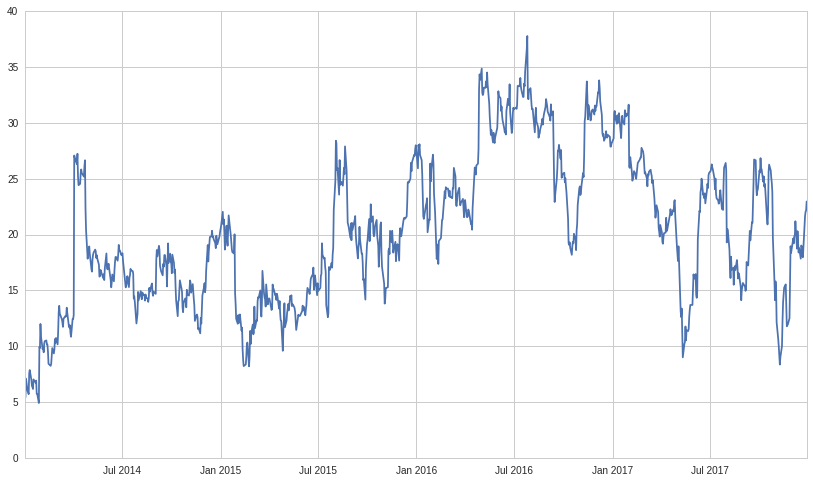

In [308]:
from sklearn.linear_model import LinearRegression
from talib import SMA

linreg = LinearRegression()
linreg.fit(np.asarray(X),y)
weights = linreg.coef_
portfolio = y - weights[0]*X[top_stocks[0]]-weights[1]*X[top_stocks[1]]-weights[2]*X[top_stocks[2]]
plt.plot(portfolio)
weights

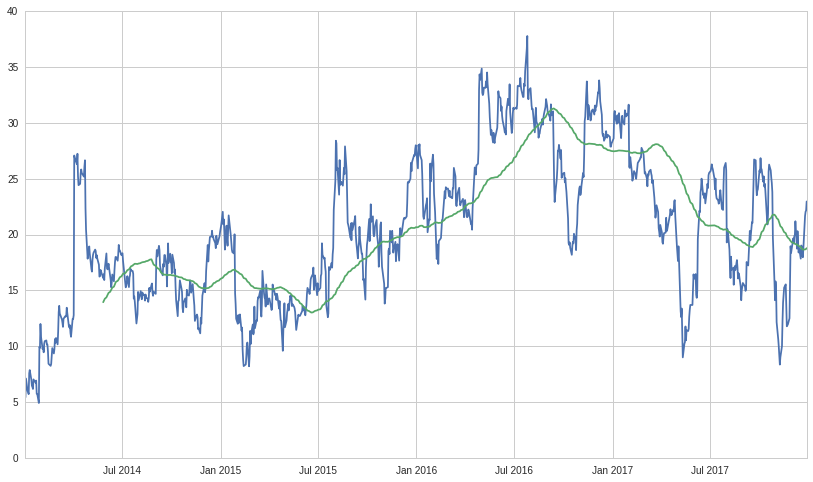

In [309]:
plt.plot(portfolio)
theo_price = SMA(portfolio,100)
plt.plot(portfolio.index,theo_price)

In [290]:
equities

Empty DataFrame
Columns: []
Index: [(2011-01-03 00:00:00+00:00, Equity(24 [AAPL])), (2011-01-03 00:00:00+00:00, Equity(863 [BHP])), (2011-01-03 00:00:00+00:00, Equity(8347 [XOM]))]

# Part 3: Risk Management

Let's set up a coin toss where the coin is slightly biased.

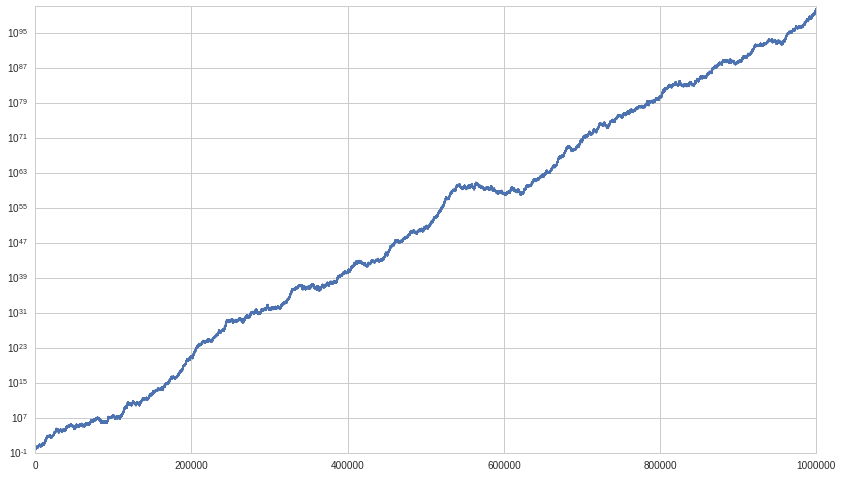

In [48]:
# Biased coin toss
k = np.sign(np.random.random(1000000)-0.49)

# This is the return
plt.semilogy(np.cumprod(1+(k*0.02)))

In [49]:
# Now calculate the PnL for 1e6 trials with varying investment
er = []
for i in range(1,300):
    k = np.sign(np.random.random(1000000)-0.49)
    er.append(np.log(np.cumprod(1+k*(0.0002*i))[-1]))

We can see that the optimum investment is about 2% of our bankroll. The profitable region is very narrow.

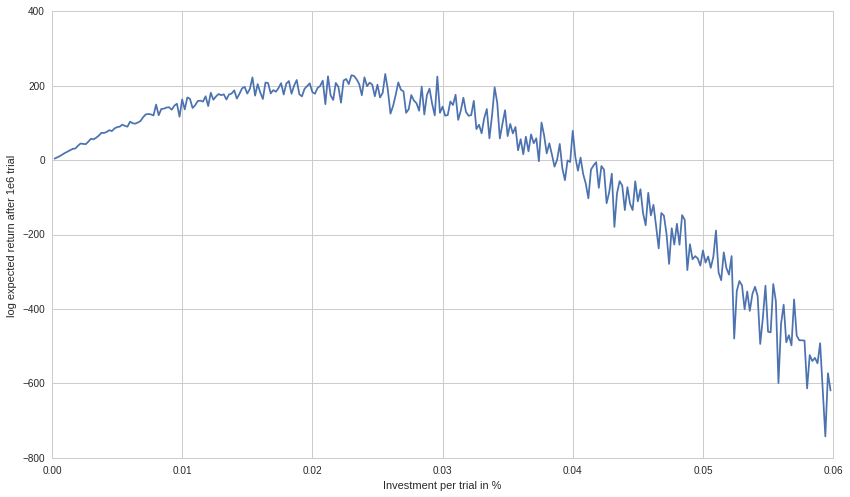

In [47]:
plt.plot(np.arange(1,300)*0.0002,er)
plt.xlabel('Investment per trial in %')
plt.ylabel('log expected return after 1e6 trial')

Let's do the same for the SPY. The odds of winning here are a bit higher. The next bit show that we would maximise our profit if we applied a leverage of 6. A leverage larger than 12 would ruin us.

In [26]:
er = []
for i in range(1,70):
    k = ret
    er.append((np.cumprod(1+k*(0.2*i))[-1]))

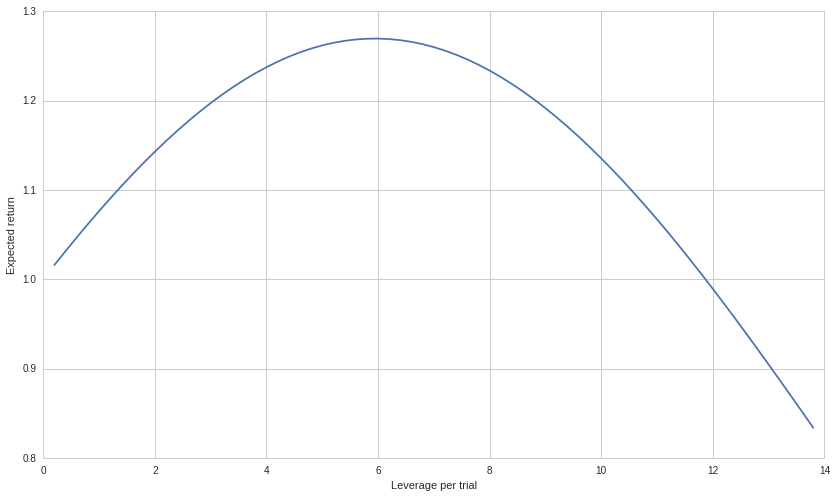

In [27]:
plt.plot(np.arange(1,70)*0.2,er)
plt.xlabel('Leverage per trial')
plt.ylabel('Expected return')

# Performance Metrics

Let's first create a series of returns

In [258]:
returns = [np.random.randn(1000) for _ in range(30)]

In [260]:
final_pnls = [sum(k) for k in returns]
final_pnls

[-25.217343115819904,
 -10.799074893041402,
 14.366206587464093,
 29.021838018909563,
 -44.691799173085506,
 42.954451137552738,
 -43.13278351647287,
 34.675108412861299,
 9.8069497422841092,
 -14.393686759349251,
 4.1847919608768755,
 -54.456715104540834,
 83.693696817697784,
 -11.119063693518081,
 -27.020484251767705,
 -39.698464299603756,
 -9.2888761408297906,
 -15.230710418230686,
 -69.682455416299732,
 -11.807890056497325,
 -13.158233857079452,
 -1.6268181833547646,
 -1.9325395654063593,
 17.372376667849313,
 -43.566343207036851,
 21.193714423961254,
 -42.856763019119505,
 -6.5014627044604367,
 -12.177360752763706,
 8.6015726287442149]

In [330]:
sharpe_ratios = [np.mean(k)/np.std(k)*np.sqrt(252) for k in returns]
sharpe_ratios

[-0.39979715596739357,
 -0.16969421120995962,
 0.23057313406267785,
 0.47399281585257313,
 -0.71494122761352141,
 0.66550405613569785,
 -0.67110958591924064,
 0.5495117573982764,
 0.15733536834484088,
 -0.23744501968688156,
 0.066405419516926606,
 -0.85571195323590399,
 1.3621434168641864,
 -0.17226738936636346,
 -0.41899992672101638,
 -0.63552301388972721,
 -0.15173059009447815,
 -0.24616880039754463,
 -1.0640317894484852,
 -0.1894466671260582,
 -0.20393625327449841,
 -0.025532232567295081,
 -0.031285479470316131,
 0.27127121868433024,
 -0.71104055570118108,
 0.3231313687560361,
 -0.67485563889259692,
 -0.10089252930388483,
 -0.19257275110115191,
 0.14018068775371759]

In [331]:
def drawdown(k):
    hwm = 0
    ddwn = []
    for i in k:
        if i > hwm:
            #print hwm
            hwm = i
    ddwn.append(hwm-i)
    return max(ddwn)

ddwns = [drawdown(np.cumsum(k)) for k in returns]         

In [328]:
profit_factor = [-sum(np.array(k)[np.array(k)>0]) / sum(np.array(k)[np.array(k)<0]) for k in returns]

#### Exercise: find a way to create a good compound metric from the different metrics. Check if it really gives you the best performance.

In [341]:
aapl_ret = get_pricing('AAPL',start_date='2017-1-1',end_date='2018-1-2',fields='price').pct_change()
spy_ret = get_pricing('SPY',start_date='2017-1-1',end_date='2018-1-2',fields='price').pct_change()

Now let's calculate alpha and beta:

In [342]:
np.polyfit(spy_ret.fillna(0),aapl_ret.fillna(0),1)

array([  1.39590553e+00,   5.90283600e-04])